In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold, cross_val_score, train_test_split

In [2]:
gbm = pd.read_csv('gbm-data.csv')
gbm.shape

(3751, 1777)

In [3]:
np_gbm = gbm.values

In [4]:
gbm_target = np_gbm[:,0]
gbm_train = np_gbm[:,1:]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(gbm_train, gbm_target, test_size = 0.8, random_state = 241)

Gradient Boosting

In [6]:
def sigmoid(z):
    return 1./(1+ np.exp(-z))

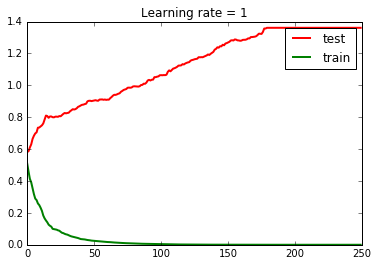

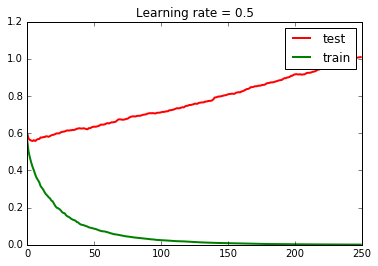

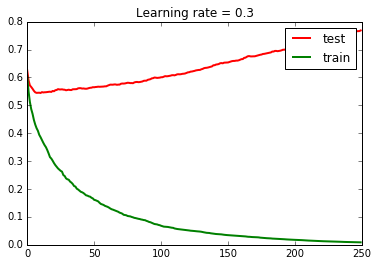

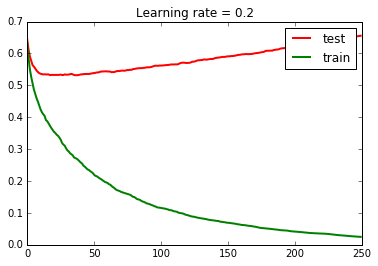

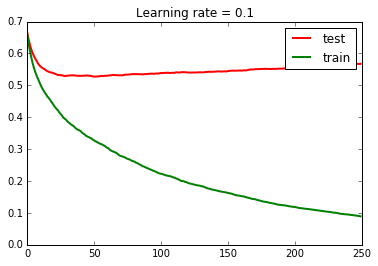

In [13]:
alpha_rate = [1, 0.5, 0.3, 0.2, 0.1] 
n_estimators = 250
for alpha in alpha_rate:
    clf = GradientBoostingClassifier(n_estimators = n_estimators, verbose = False, random_state = 241, learning_rate = alpha)
    clf.fit(X_train, y_train)
    train_loss = np.zeros((n_estimators,))
    test_loss = np.zeros((n_estimators,))
    for i, y_train_pred in enumerate(clf.staged_decision_function(X_train)):
        train_loss[i] = metrics.log_loss(y_train, sigmoid(y_train_pred))
        
    for i, y_test_pred in enumerate(clf.staged_decision_function(X_test)):
        test_loss[i] = metrics.log_loss(y_test, sigmoid(y_test_pred))
        
    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.title('Learning rate = '+ str(alpha))
    plt.legend(['test', 'train'])
    plt.show()

In [10]:
n_estimators = 250
clf = GradientBoostingClassifier(n_estimators = n_estimators, verbose = False, random_state = 241, learning_rate = 0.2)
clf.fit(X_train, y_train)
test_loss = np.zeros((n_estimators,))
for i, y_test_pred in enumerate(clf.staged_decision_function(X_test)):
    test_loss[i] = metrics.log_loss(y_test, sigmoid(y_test_pred))

In [11]:
min_log_loss = np.min(test_loss)
print min_log_loss
print np.argmin(test_loss), test_loss[np.argmin(test_loss)]

0.531877684014
36 0.531877684014


Random Forest

In [18]:
rf_clf = RandomForestClassifier(n_estimators = 200, random_state = 241)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict_proba(X_test)[:, 1]
rf_loss = metrics.log_loss(y_test, pred)
rf_loss

0.52583680729149851